# Task 2.3 – Classification

Classification describes the problem of identifying to which of a set of categories a new observation belongs, on the basis of a training set of data containing observations whose category membership is known. Examples are assigning a given email to the "spam" or "non-spam" class.

One of the most amazing things about Python’s scikit-learn library is that is has a simple 4-step modeling pattern that can be applied to nearly any machine learning task given. Syntax wise there is no difference between regression and classification. While this task uses a Random Forests classifier, the coding process in this tutorial applies to other classifiers in scikit-learn (Decision Tree, SVM etc). In this task, we use classification algorithms to predict digit labels based on images. The image below shows a bunch of training digits (observations) from the MNIST dataset whose category membership is known (labels 0–9). After training the model it can be used to predict an image label (labels 0–9) given an image.

#### Loading the Data (Digits Dataset)
The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape", digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [3]:
 pd.DataFrame(digits.data).describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


#### Visualizing the Images and the Labels (Digits Dataset)
This section is really just to show what the images and labels look like. It usually helps to visualize your data to see what you are working with.

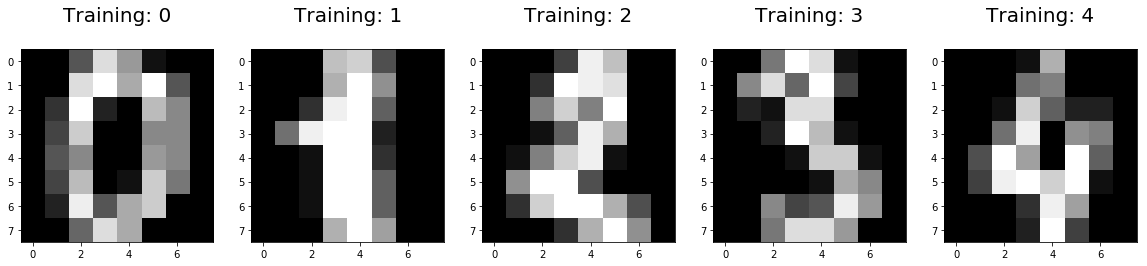

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
     plt.subplot(1, 5, index + 1)
     plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
     plt.title('Training: %i\n' % label, fontsize = 20)

#### Splitting Data into Training and Test Sets (Digits Dataset)
We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Model Training (Scikit-learn 4-Step Modeling Pattern)

**Step 1.** Import the model you want to use
In scikit-learn, all machine learning models are implemented as Python classes

In [6]:
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


**Step 2.** Make an instance of the Model and define parameters (optional)

In [7]:
# all parameters not specified are set to their defaults
classifier = RandomForestClassifier()

**Step 3.** Training the model on the data, storing the information learned from the data.

The model is learning the relationship between digits (x_train) and labels (y_train).

In [8]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

**Step 4.** Predict labels for new data (new images)

Uses the information the model learned during the model training process

In [9]:
# Predict for One Observation (image)
classifier.predict([x_test[0]])

array([2])

Predict for Multiple Observations (images) at once

In [10]:
classifier.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

Make predictions on entire test data

In [11]:
y_pred = classifier.predict(x_test)

### Evaluating the Model's Performance
While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on the new data (test set)

#### Accuracy
Accuracy is defined as: (fraction of correct predictions): correct predictions / total number of data points


In [12]:
# Use score method to get accuracy of model
score = classifier.score(x_test, y_test)
print(score)

0.9355555555555556


#### Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. In this section, I am just showing two python packages (Seaborn and Matplotlib) for making confusion matrices more understandable and visually appealing.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

The confusion matrix below is not visually super informative or visually appealing.

In [14]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  0  2]
 [ 1  3 39  0  0  0  0  0  1  0]
 [ 0  0  0 43  0  1  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  1  0 50  0  1  0]
 [ 0  0  0  0  2  0  0 46  0  0]
 [ 0  3  0  1  0  1  0  0 43  0]
 [ 0  0  0  2  0  2  0  1  3 39]]


As you can see below, this method produces a more understandable and visually readable confusion matrix using seaborn.

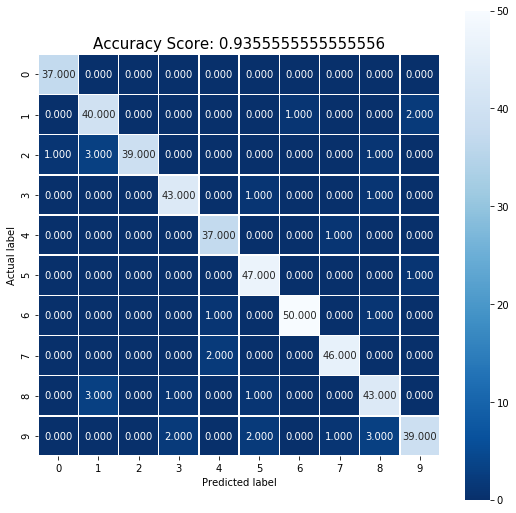

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Task 2.3-1:  Classification

1. Apply a Logistic Regression Classifier and compare the results
* Print some additional classification metrics

In [16]:
from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression()

clf2.fit(x_train, y_train)

clf2.score(x_test, y_test)

0.9533333333333334

# Appendix

### complete MNIST dataset

One important point to emphasize that the digit dataset contained in sklearn is too small to be representative of a real world machine learning task.
We are going to use the MNIST dataset because it is for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. One of the things we will notice is that parameter tuning can greatly speed up a machine learning algorithm’s training time.

In [17]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

Now that you have the dataset loaded you can use the commands below

In [18]:
# These are the images
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


to see that there are 70000 images and 70000 labels in the dataset

#### Splitting Data into Training and Test Sets

The code below splits the data into training and test data sets. The test_size=1/7.0 makes the training set size 60,000 images and the test set size of 10,000.


In [19]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 mnist.data, mnist.target, test_size=1/7.0, random_state=0)

#### Model Training
One thing I like to mention is the importance of parameter tuning. While it may not have mattered much for the smaller digits dataset, it makes a bigger difference on larger and more complex datasets. While usually one adjusts parameters for the sake of accuracy, in the case below, we are adjusting the parameter solver to speed up the fitting of the model.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

Please see the documentation if you are curious what changing solver does. Essentially, we are changing the optimization algorithm.

In [22]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([1.])

#### Measuring Model Performance

In [24]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9134


One thing I briefly want to mention is that is the default optimization algorithm parameter was solver = liblinear and it took 2893.1 seconds to run with a accuracy of 91.45%. When I set solver = lbfgs , it took 52.86 seconds to run with an accuracy of 91.3%. Changing the solver had a minor effect on accuracy, but at least it was a lot faster.

https://www.datasciencecentral.com/profiles/blogs/an-overview-of-gradient-descent-optimization-algorithms

![](https://cdn-images-1.medium.com/max/800/1*XVFmo9NxLnwDr3SxzKy-rA.gif)